<a href="https://colab.research.google.com/github/higshitani/higshitani.github.io/blob/main/PY_DS_2021_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 「Pythonによるデータ科学入門」 DAY 9のスライド中のコード


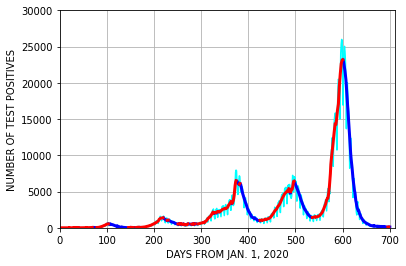

In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('covid-19-patient.txt', skiprows=1)
days = data[:,0]
patients = data[:,1]

N = len(patients)
WSIZE = 7
avr_patients = []
for i in range(N):
    s = 0
    n = 0
    for j in range(i-WSIZE//2,i+WSIZE//2+1):
        if j>=0 and j<N:
            s = s + patients[j]
            n = n + 1
    avr_patients.append(s/n)

avr_patients = np.array(avr_patients)

delta = np.diff(avr_patients,prepend=0)

pinc = np.ma.masked_where(delta<0, avr_patients)
pdec = np.ma.masked_where(delta>=0, avr_patients)

plt.plot(days, patients, color=(0,1,1))
plt.plot(days, pdec, '-', color=(0,0,1), lw=3)
plt.plot(days, pinc, '-', color=(1,0,0), lw=3)
plt.xlabel('DAYS FROM JAN. 1, 2020')
plt.ylabel('NUMBER OF TEST POSITIVES')
plt.xlim(0,710)
plt.ylim(0,30000)
plt.grid(True)
plt.show()


**質問に対する補足**

12/14の授業で、NHKのサイトのCSVデータをそのまま読み込んだとき、日付を（基準となる日からの）日数に変換する方法について質問を受けました。以下に、コードの例を示します（もっとスマートな方法があるかもしれません）。

datetimeオブジェクトに変換すると、日付や時間の計算が簡単にできます。


In [ ]:
# coding: utf-8
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('nhk_news_covid19_domestic_daily_data.csv')
dates = data['日付']
npositives = data['国内の感染者数_1日ごとの発表数']

days = []
for x in dates:
    days.append( (pd.to_datetime(x) - pd.to_datetime('2020/01/01')).days )

plt.plot(days,npositives)
plt.xlabel('Days from 2020/01/01')
plt.show()

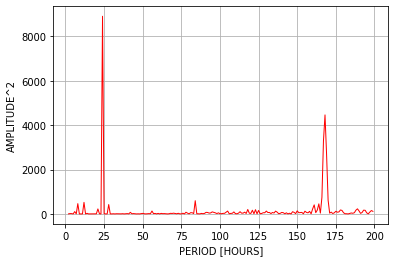

In [ ]:
# coding: utf-8                                                                                                                                                                                                  
import pandas as pd
import math
import matplotlib.pyplot as plt

data = pd.read_csv('juyo_2020_tohoku.txt', 
       encoding='Shift_JIS', skiprows=1)
date = data['DATE'].str.cat(data['TIME'],sep=" ")
datetime =  pd.to_datetime(date,format='%Y/%m/%d %H:%M')
unixtime = datetime.map(pd.Timestamp.timestamp)

x = data['実績(万kW)'].tolist()
N = len(x)

AMP2 = [ ]
PERIOD = []
for period in range(2,200,1):
    omega = 2*math.pi/period
    s=0
    c=0
    for i in range(N):
        s = s + math.sin(omega*i) * x[i]
        c = c + math.cos(omega*i) * x[i]

    AMP2.append( (s*2/N)**2 + (c*2/N)**2)
    PERIOD.append(period)

plt.plot(PERIOD,AMP2, color=(1.0,0.0,0.0), linewidth=1.0)
plt.xlabel('PERIOD [HOURS]')
plt.ylabel('AMPLITUDE^2')
plt.grid(True)
plt.show()


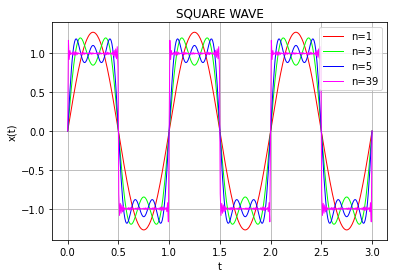

In [ ]:
# coding: utf-8
import numpy as np
import math
import matplotlib.pyplot as plt

t = np.linspace(0,3,400)

x1 = 4/(1*np.pi)*np.sin(2*np.pi*1*t)
x3 = 4/(1*np.pi)*np.sin(2*np.pi*1*t) + 4/(3*np.pi)*np.sin(2*np.pi*3*t)
x5 = 4/(1*np.pi)*np.sin(2*np.pi*1*t) + 4/(3*np.pi)*np.sin(2*np.pi*3*t) \
     + 4/(5*np.pi)*np.sin(2*np.pi*5*t)

xn = np.zeros(shape=(t.shape[0],))
for n in range(1,40,2):
    xn += 4/(n*np.pi)*np.sin(2*np.pi*n*t)

plt.title("SQUARE WAVE")
plt.plot(t, x1, color=(1.0,0.0,0.0), linewidth=1.0, label="n=1")
plt.plot(t, x3, color=(0.0,1.0,0.0), linewidth=1.0, label="n=3")
plt.plot(t, x5, color=(0.0,0.0,1.0), linewidth=1.0, label="n=5")
plt.plot(t, xn, color=(1.0,0.0,1.0), linewidth=1.0, label="n=39")
plt.legend()
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid(True)
plt.show()

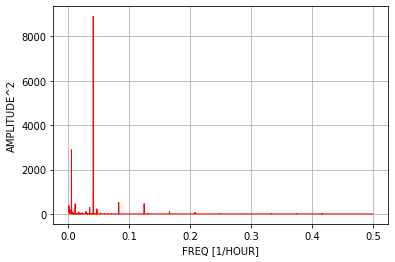

In [ ]:
# coding: utf-8

import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('juyo_2020_tohoku.txt', 
       encoding='Shift_JIS', skiprows=1)

date = data['DATE'].str.cat(data['TIME'],sep=" ")
datetime =  pd.to_datetime(date,format='%Y/%m/%d %H:%M')
unixtime = datetime.map(pd.Timestamp.timestamp)

x = data['実績(万kW)'].tolist()
N = len(x)

freq = np.linspace(0,1.0,N)
y = np.fft.fft(x)
amp2 = np.absolute(y*2/N)**2

plt.plot(freq[10:N//2], amp2[10:N//2], color=(1.0,0.0,0.0), linewidth=1.0)
plt.xlabel('FREQ [1/HOUR]')
plt.ylabel('AMPLITUDE^2')
plt.grid(True)
plt.show()


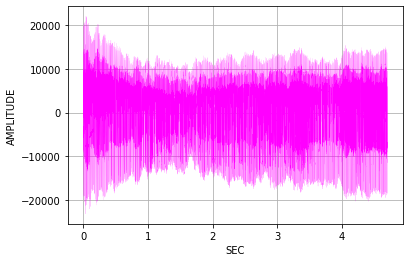

In [ ]:
# coding: utf-8
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

data = wavfile.read('voice.wav')
framerate = data[0]
X = data[1]
N = len(X)
frames=np.linspace(0,N/framerate,N)
plt.plot(frames,X, color=(1.0,0.0,1.0), linewidth=0.1)
plt.xlabel('SEC')
plt.ylabel('AMPLITUDE')
plt.grid(True)
plt.show()


In [ ]:
from IPython.display import Audio
Audio(X,rate=framerate)

##補足

講義動画の中では触れませんでしたが、FFTを使うと、移動平均のような「フィルター」効果を柔軟に実現することができます。
例えば、前回の授業で紹介した「音の移動平均」のように、音データにローパスフィルタをかけている例を以下に示します（実行するには、前回の授業で使った音データ chime.wav が必要です）。
一旦データをフーリエ変換した後、kについてのforループの中で、wという重みを使って、各フーリエ成分の「強弱」を調整しています。この例ではガウス型の関数を使って、kの小さい領域（低域）をよく透過させるようにしています。
その後で、逆フーリエ変換( np.fft.ifft(y)のところ )を行って、音信号に戻しています。

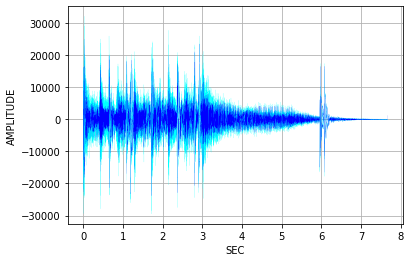

In [ ]:
# coding: utf-8                                                                                                                                          
import numpy as np
import math
from scipy.io import wavfile
import matplotlib.pyplot as plt

data = wavfile.read('chime.wav')

framerate = data[0]
x_raw = data[1]

y = np.fft.fft(x_raw)
N = y.shape[0]
kc = framerate/4

for k in range(1,N//2):
   w = math.exp(-k**2/kc**2)
   y[k] = y[k] * w
   y[N-k] = y[N-k] * w

if N%2==0:
    y[N//2] = y[N//2] * math.exp(-(N/2)**2/kc**2)

x = np.real(np.fft.ifft(y))

frames=np.linspace(0,N/framerate,N)

plt.plot(frames,x_raw, color=(0.0,1.0,1.0), linewidth=0.1)
plt.plot(frames,x, color=(0.0,0,1.0), linewidth=0.1)
plt.xlabel('SEC')
plt.ylabel('AMPLITUDE')
plt.grid(True)
plt.show()

wavfile.write('soft_chime.wav',framerate,x/np.max(x))